In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import networkx as nx
import seaborn as sns

In [2]:
df = pd.read_csv("../Datasets/flavornet_dataset.csv")

In [3]:
df = df.dropna() # Drop N/A values
print("Number of odorants is %d" % len(df))
print("\n")
print("Sample of the dataset")
print(df.head())

Number of odorants is 634


Sample of the dataset
          Odorant                      Odor SMILES representation    exactmw  \
0  trimethylamine                      fish                CN(C)C  59.073499   
1         ethanal            pungent, ether                  CC=O  44.026215   
2    methanethiol  sulfur, gasoline, garlic                    CS  48.003371   
3        propanal          solvent, pungent                 CCC=O  58.041865   
4         pentane                    alkane                 CCCCC  72.093900   

   lipinskiHBA  lipinskiHBD  NumRotatableBonds  NumHBD  NumHBA  \
0          1.0          0.0                0.0     0.0     1.0   
1          1.0          0.0                0.0     0.0     1.0   
2          0.0          0.0                0.0     1.0     1.0   
3          1.0          0.0                1.0     0.0     1.0   
4          0.0          0.0                2.0     0.0     0.0   

   NumHeteroatoms  ...  NumSaturatedHeterocycles  NumAliphaticHeterocycl

In [4]:
# Bar graph to view the distribution of number of descriptors per molecule
num_descriptors = [0]*6 # array with the distributions. Max 5 descriptors per molecule
odors_series = df['Odor']
odors_series = odors_series.str.split(",") # Pandas series method to split on a delimiter

def get_odor_distribution(array):
    # Input is a row of the Series containing descriptors
    number_of_descriptors = len(array)
    num_descriptors[number_of_descriptors] += 1

odors_series.apply(get_odor_distribution)

0      None
1      None
2      None
3      None
4      None
       ... 
732    None
733    None
734    None
735    None
737    None
Name: Odor, Length: 634, dtype: object

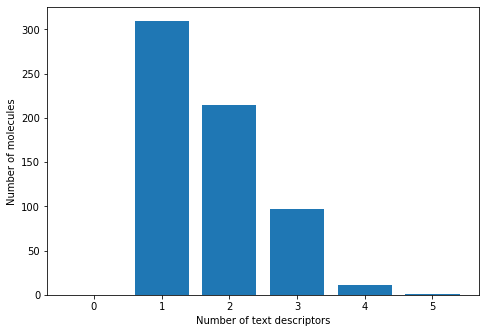

In [5]:
indices = [x for x in range(0, len(num_descriptors))]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(indices,num_descriptors)
plt.xlabel("Number of text descriptors")
plt.ylabel("Number of molecules")
plt.show()

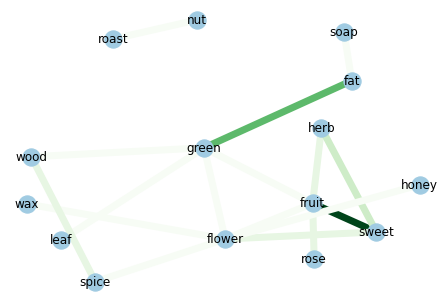

In [6]:
# Code to visualize the connection strength between descriptors

edge_dict = {} # Dictionary of edges and corresponding counts
total_pairs = 0
def create_edge_list(array):
    global total_pairs
    array = sorted([name.strip().strip(',').lower() for name in array])
    if len(array) > 1:
        # If there is more than one descriptor
        for pair in itertools.combinations(array, 2):
            total_pairs += 1
            final_pair = pair[0] + "," + pair[1]
            edge_dict[final_pair] = edge_dict.get(final_pair, 0) + 1 # Update dictionary value

odors_series.apply(create_edge_list) # Create edge list from data

# Create a graph object #
connection_strength_graph = nx.Graph()

# Now need to update dictionary counts as weights by dividing by total
for edge in edge_dict:
    if edge_dict[edge] > 3:
        # Too many nodes make it hard to visualize the graph; removing edges that don't occur more than thrice
        edge_list = edge.split(',')
        weight = edge_dict[edge]/total_pairs
        connection_strength_graph.add_edge(edge_list[0], edge_list[1], weight=weight) # Add this edge to the graph


final_edges,final_weights = zip(*nx.get_edge_attributes(connection_strength_graph,'weight').items())
nx.draw(connection_strength_graph, node_color='#A0CBE2', edge_color=final_weights, width=7, edge_cmap=plt.cm.Greens, with_labels=True)
plt.show()

In [7]:
# Code to get the unique labels in the dataset

all_labels = []
def number_of_descriptors(array):
    global all_labels
    array = [name.strip().strip(',').lower() for name in array]
    for label in array:
        if label not in all_labels:
            all_labels.append(label)


odors_series.apply(number_of_descriptors)

print("The number of unique labels in the original dataset is %d" % len(all_labels))
print(all_labels)

The number of unique labels in the original dataset is 189
['fish', 'pungent', 'ether', 'sulfur', 'gasoline', 'garlic', 'solvent', 'alkane', 'alcohol', 'cabbage', 'pineapple', 'herb', 'wine', 'bitter', 'flower', 'mint', 'cocoa', 'almond', 'malt', 'alkaline', 'sweet', 'rancid', 'soy', 'butter', 'apple', 'medicine', 'fruit', 'green', 'cream', 'cheese', 'sweat', 'grape', 'sour', 'onion', 'putrid', 'whiskey', 'burnt', 'strawberry', 'tomato', 'cooked vegetable', 'metal', 'balsamic', 'plastic', 'rubber', 'paint', 'banana', 'grass', 'tallow', 'fat', 'chemical', 'leaf', 'truffle', 'baked', 'pear', 'bread', 'amine', 'smoke', 'earth', 'nut', 'popcorn', 'thiamin', 'acid', 'meat', 'camphor', 'resin', 'mold', 'cooked potato', 'walnut', 'geranium', 'soap', 'roasted nut', 'yeast', 'roasted meat', 'citrus', 'biscuit', 'must', 'roast beef', 'peanut butter', 'wood', 'pesticide', 'roast', 'cat', 'black currant', 'mushroom', 'fresh', 'pine', 'turpentine', 'marshmallow', 'burnt sugar', 'potato', 'cooked me

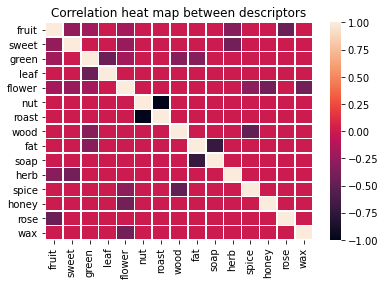

In [8]:
corr_matrix = nx.normalized_laplacian_matrix(connection_strength_graph, weight=final_edges)
heatmap_labels = connection_strength_graph.nodes()
ax = sns.heatmap(corr_matrix.toarray(), xticklabels=heatmap_labels, yticklabels=heatmap_labels, linewidth=0.5)
ax.set_title('Correlation heat map between descriptors')
plt.show()